In [31]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
results = []
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/sp/'
for i in ['','1','2','3','4']:
    filename = 'sp_lp_bi'+i+'.pkl'
    with open(root+filename, 'rb') as file:
        records = pickle.load(file)
    results.append(records)


In [21]:
np.mean(np.array(results).T, axis=1)

array([0.82297692, 0.51920388])

In [22]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'
df = pd.DataFrame()
col1 = []
rocs = []
prs = []
ds = []
for w in ['0','1']:
    for re in ['False','True']:
        for d in ['2','3','8']:
            for dataset in ['ppi_linkpredict','ppi_linkpredict2','ppi_linkpredict3','ppi_linkpredict4','ppi_linkpredict5']:
                if dataset == 'ppi_linkpredict':
                    name = 'Dataset-'+dataset+'--RE-'+re+'--W-'+w+'--Epochs-15000--D-'+d+'--RH-25--LR-0.1--LP-True--CUDA-True/'
                else:
                    name = 'Dataset-'+dataset+'--RE-'+re+'--W-'+w+'--Epochs-5000--D-'+d+'--RH-25--LR-0.1--LP-True--CUDA-True/'
                with open(root+name+'records.pkl', 'rb') as file:
                    records = pickle.load(file)
                record_df = pd.DataFrame({'RE':re,'W':w,'d': 8,'epoch': records[0], 'roc': records[1], 'pr': records[2]})

                df = pd.concat([df, record_df], ignore_index=True)

                df['d'] = df['d'].astype(int)
                df['epoch'] = df['epoch'].astype(int)
                df['roc'] = df['roc'].astype(float)
                df['pr'] = df['pr'].astype(float)

                subdf = df[(df['epoch']==4000)]
                groups = subdf.groupby(['W','RE'])
                for i, (name, group) in enumerate(groups):
                    col1.append(name)
                    ds.append(d)
                    rocs.append(round(group['roc'].mean(),3))
                    prs.append(round(group['pr'].mean(),3))
                    #print(i, , round(group['roc'].var(),3), round(group['pr'].mean(),3), round(group['pr'].var(),3))

In [28]:
df = pd.DataFrame({
    'name': col1,
    'd': ds,
    'roc': rocs,
    'pr': prs
})

In [29]:
df

,name,d,roc,pr
0,"(0, False)",2,0.869,0.862
1,"(0, False)",2,0.869,0.861
2,"(0, False)",2,0.868,0.861
3,"(0, False)",2,0.868,0.860
4,"(0, False)",2,0.868,0.860
...,...,...,...,...
145,"(1, True)",8,0.895,0.902
146,"(0, False)",8,0.883,0.881
147,"(0, True)",8,0.902,0.907
148,"(1, False)",8,0.877,0.879


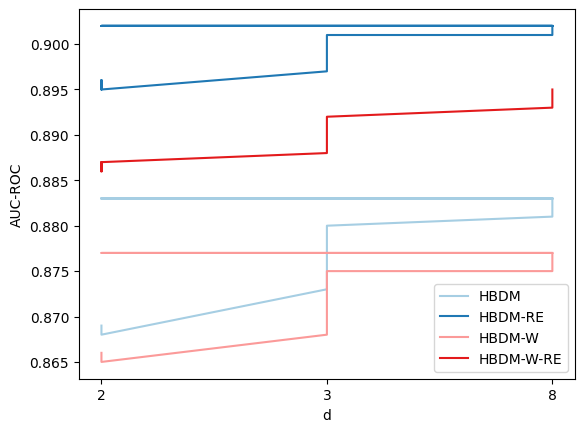

In [30]:
subdf = df
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]
# Group the data by 'RE' and 'W'
groups = subdf.groupby(['name'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['d']
    y_data = group['roc']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('d')
ax.set_ylabel('AUC-ROC')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [14]:
groups = subdf.groupby(['W','RE'])
for i, (name, group) in enumerate(groups):
    print(i, round(group['roc'].mean(),3), round(group['roc'].var(),3), round(group['pr'].mean(),3), round(group['pr'].var(),3))

0 0.868 0.0 0.86 0.0
1 0.895 0.0 0.901 0.0
2 0.865 0.0 0.862 0.0
3 0.887 0.0 0.894 0.0


In [6]:
for i, (name, group) in enumerate(groups):
    print(name)

('0', 'False')
('0', 'True')
('1', 'False')
('1', 'True')


In [76]:
subdf = df[df['d']==3] 

In [78]:
colors = sns.color_palette("Paired",n_colors=6)

In [81]:
print(type(colors))

<class 'seaborn.palettes._ColorPalette'>


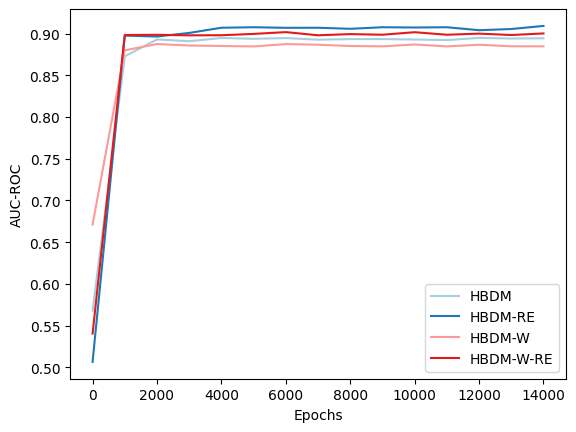

In [82]:
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]
# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['epoch']
    y_data = group['roc']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-ROC performance over various models for varying epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('AUC-ROC')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

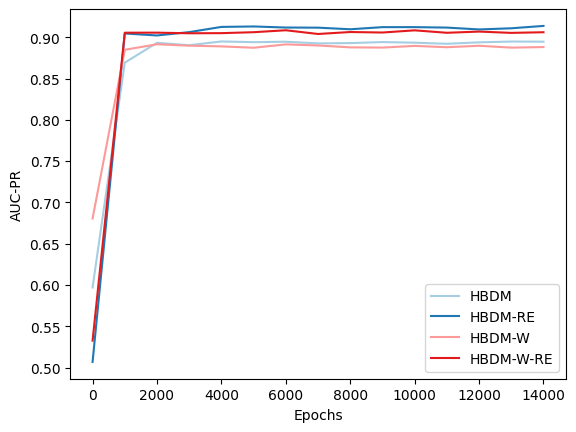

In [84]:
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]
# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['epoch']
    y_data = group['pr']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('AUC-PR')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

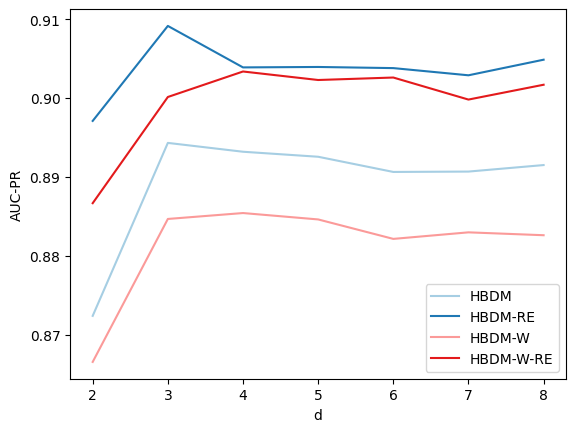

In [90]:
subdf = df[df['epoch']==14000] 
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]
# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['d']
    y_data = group['roc']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('d')
ax.set_ylabel('AUC-PR')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [85]:
maxroc=[]
maxpr = []
for w in ['0','1']:
    for re in ['False','True']:
        #for d in ['2','3','4','5','6','7','8']:
        for d in [2,3,4,5,6,7,8]:
            subdf = df[(df['RE']==re)&(df['W']==w)&(df['d']==d)]
            max_roc_index = subdf['roc'].idxmax()
            maxroc.append(max_roc_index)
            max_pr_row = subdf['pr'].idxmax()
            maxpr.append(max_pr_row)

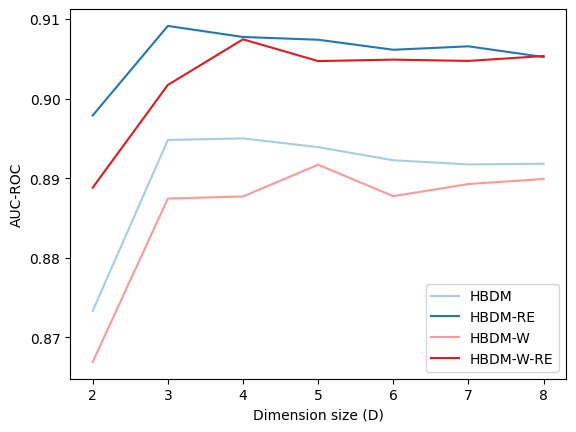

In [86]:
maxrocdf = df.iloc[maxroc]
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = maxrocdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['d']
    y_data = group['roc']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-ROC performance over various models for varying embedding sizes')
ax.set_xlabel('Dimension size (D)')
ax.set_ylabel('AUC-ROC')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

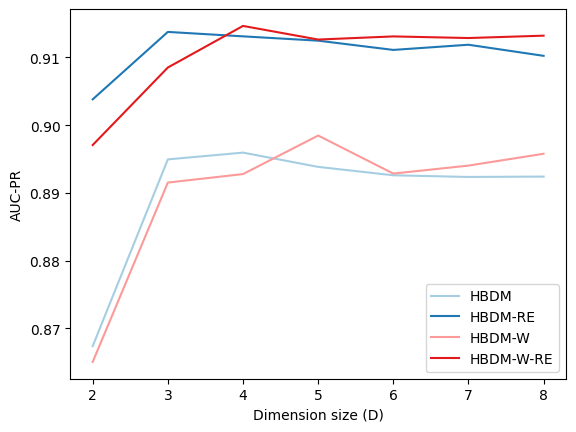

In [87]:
maxrocdf = df.iloc[maxpr]
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = maxrocdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['d']
    y_data = group['pr']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying embedding sizes')
ax.set_xlabel('Dimension size (D)')
ax.set_ylabel('AUC-PR')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [18]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'
df = pd.DataFrame()
loss_dict = dict()
for w in ['0','1']:
    for re in ['False','True']:
        for d in ['2','8']:
            for e in ['5000','5001','5002','5003','5004']:
                name = 'Dataset-ppi--RE-'+re+'--W-'+w+'--Epochs-'+e+'--D-'+d+'--RH-25--LR-0.1--LP-False--CUDA-True/'
                with open(root+name+'records.pkl', 'rb') as file:
                    records = pickle.load(file)
                record_df = pd.DataFrame({'RE':re,'W':w,'d': d,'epoch': records[0], 'roc': records[1], 'pr': records[2]})
                loss_dict[w+re+d] = records[-1]
                df = pd.concat([df, record_df], ignore_index=True)

In [112]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'
df = pd.DataFrame()
for w in ['0','1']:
    for re in ['False','True']:
        for d in ['2','8']:
            for e in ['5000','5001','5002','5003','5004']:
                name = 'Dataset-ppi--RE-'+re+'--W-'+w+'--Epochs-'+e+'--D-'+d+'--RH-25--LR-0.1--LP-False--CUDA-True/'
                with open(root+name+'records.pkl', 'rb') as file:
                        records = pickle.load(file)
                record_df = pd.DataFrame({'RE':re,'W':w,'d':d,'epoch': records[0]})
                for i, k in enumerate([50,100,150,200,250,300,350,400]):
                    colname = 'roc_'+str(k)
                    record_df[colname] = np.array(records[1]).T[i]
                df = pd.concat([df, record_df], ignore_index=True)
df['d'] = df['d'].astype(int)
df['epoch'] = df['epoch'].astype(int)

In [127]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'
df = pd.DataFrame()
for w in ['0','1']:
    for re in ['False','True']:
        for d in ['2','8']:
            for e in ['5002']:
                name = 'Dataset-ppi--RE-'+re+'--W-'+w+'--Epochs-'+e+'--D-'+d+'--RH-25--LR-0.1--LP-False--CUDA-True/'
                with open(root+name+'records.pkl', 'rb') as file:
                        records = pickle.load(file)
                record_df = pd.DataFrame({'RE':re,'W':w,'d':d,'epoch': records[0]})
                for i, k in enumerate([50,100,150,200,250,300,350,400]):
                    colname = 'roc_'+str(k)
                    record_df[colname] = np.array(records[1]).T[i]
                df = pd.concat([df, record_df], ignore_index=True)
df['d'] = df['d'].astype(int)
df['epoch'] = df['epoch'].astype(int)

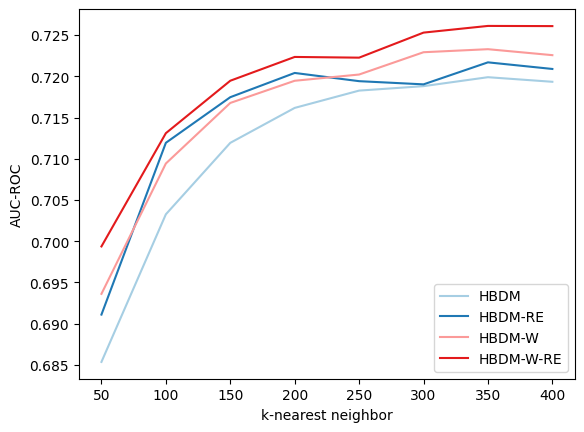

In [137]:
y_lists = [
    [0.6853591369580977, 0.7032636516171955, 0.71192963730966865, 0.7161682604501225, 0.718267108210549, 0.7188069463205411, 0.7198923571101463, 0.7193364166289378],
[0.69110024171693258, 0.7119354470856221, 0.7174668830366404, 0.72040814976804616, 0.71941105854960874, 0.7190241538643926, 0.72169396089999285, 0.7208920341305423],
[0.693616321310973, 0.7094249836941549, 0.7167694110821864, 0.7194602385357113, 0.7202164531943435, 0.7229209209841512, 0.7232898350313002, 0.7225658842194812],
[0.699365902925358, 0.7131023184426847, 0.7194642203270863, 0.7223493987771961, 0.7222629694727084, 0.7253008702946036, 0.7261118034759897, 0.7260894406241667]
]
subdf = df[(df['epoch']==4000)&(df['d']==8)]
subdf = subdf[['RE', 'W', 'roc_50', 'roc_100', 'roc_150', 'roc_200',
       'roc_250', 'roc_300', 'roc_350', 'roc_400']]
# Melt the dataframe to convert the columns to rows
df_melt = subdf.melt(id_vars=['RE', 'W'], value_vars=['roc_50', 'roc_100', 'roc_150', 'roc_200',
       'roc_250', 'roc_300', 'roc_350', 'roc_400'], var_name='x', value_name='y')

# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = df_melt.groupby(['W', 'RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = [50,100,150,200,250,300,350,400]
    #y_data = list(map(float, group['y']))
    y_data = y_lists[i]

    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-ROC performance over various models for varying k-neighbors')
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('AUC-ROC')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

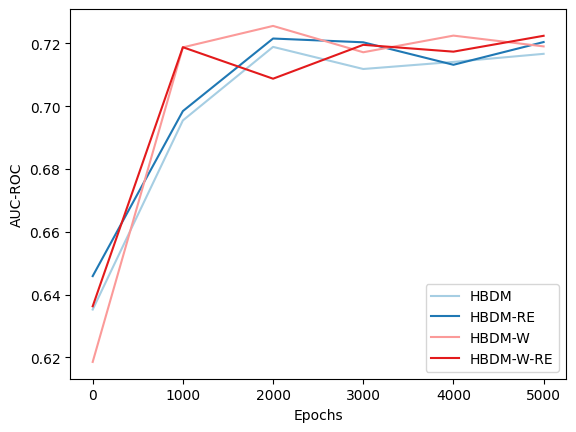

In [130]:
y_lists = [[0.6352114390549317, 0.6954446068638315, 0.7188681395346508, 0.7118281136791672, 0.7140814976804616, 0.716657540495742],
           [0.6458630152807553, 0.6984222976938594, 0.7215317765280371, 0.7203325782183783, 0.7131682604501225, 0.7204103544595862],
[0.6185302934838874, 0.7187178567495859, 0.7255470320449792, 0.717158136743822, 0.7224602385357113, 0.7190280963245339],
[0.636253685578897, 0.7187685550880525, 0.7087365182338659, 0.7195243210751838, 0.7173493987771961, 0.722402677563363]]
subdf = df[df['d']==8]
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['epoch']
    #y_data = group['roc_200']
    y_data = y_lists[i]

    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('AUC-ROC')
# Add a legend to the plot
ax.legend()
# Display the plot
plt.show()

In [ ]:
[0.614830401940187, 0.6717866914189485, 0.6667158396992242, 0.6865689686268235, 0.6800367970058397, 0.6965590668506443]
[0.6158551442616853, 0.6833115581768391, 0.6800234323887813, 0.6917267178287894, 0.6842335216162201, 0.6930736927436064]
[0.5982684670459334, 0.6919169756934234, 0.7030830627943494, 0.6911119499871878, 0.6935002043090949, 0.690168466431001]
[0.6082724024584435, 0.6910275744622366, 0.6961222395436417, 0.6901282906607863, 0.7005183106934476, 0.7103738223886278]

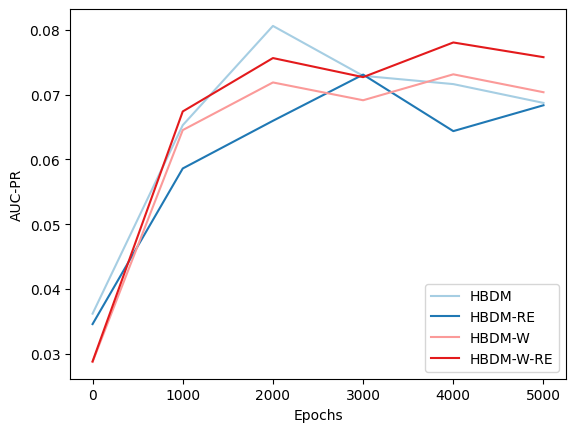

In [69]:
y_lists = [
[0.03617645042410696, 0.06529742358486758, 0.08063296076116924, 0.07292240919350879, 0.07164475069764845, 0.068733890734245],
[0.03456446930821369, 0.05861022806569612, 0.06597401105982033, 0.07311080107189427, 0.06437884322230773, 0.068374350980925],
[0.02871974592980856, 0.06453815730233922, 0.07189996304174587, 0.06914883557190228, 0.073155257386497, 0.07038878132096278],
[0.028797290035365207, 0.06742015276351014, 0.07566784193897973, 0.07271917854770309, 0.07807582139015441, 0.07580451473708934]
]

subdf = df[df['d']==8]
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['epoch']
    #y_data = group['roc_50']
    y_data = y_lists[i]
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('AUC-PR')
# Add a legend to the plot
ax.legend()
# Display the plot
plt.show()

In [135]:
root = '/novo/omdb/pds02/PDS2843/data/sprint_tid_ascvd/gzn/thesis/HBDM/results/models/'
df = pd.DataFrame()
for w in ['0','1']:
    for re in ['False','True']:
        for d in ['2','8']:
            for e in ['5002']:
                name = 'Dataset-ppi--RE-'+re+'--W-'+w+'--Epochs-'+e+'--D-'+d+'--RH-25--LR-0.1--LP-False--CUDA-True/'
                with open(root+name+'records.pkl', 'rb') as file:
                        records = pickle.load(file)
                record_df = pd.DataFrame({'RE':re,'W':w,'d':d,'epoch': records[0]})
                for i, k in enumerate([50,100,150,200,250,300,350,400]):
                    colname = 'roc_'+str(k)
                    record_df[colname] = np.array(records[2]).T[i]
                df = pd.concat([df, record_df], ignore_index=True)
df['d'] = df['d'].astype(int)
df['epoch'] = df['epoch'].astype(int)

y_lists = [[0.067659285219644781, 0.06594921466103443, 0.0651699971863072, 0.06355642798819864, 0.062584062579777769, 0.062472083909376228, 0.062421678060157296, 0.06150412648787612],
[0.06772633606268442, 0.0670147160438936, 0.06543041524780794, 0.066010124995631866, 0.057192745011589705, 0.05572095478223197, 0.0542724361366315, 0.05412249280478991],
[0.07009529852637497, 0.06331659503743877, 0.0615769849881557, 0.059637088805674884, 0.056563880572863524, 0.055827352111261, 0.056631049462659434, 0.05538911273631034],
[0.07578358902577793, 0.07215286478517337, 0.07168445957825699, 0.06976766281991598, 0.06627984357634742, 0.06583951500543601, 0.06509955949801763, 0.06641447716359879]]

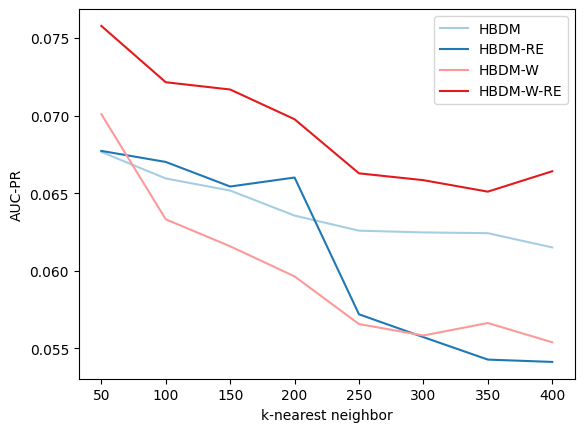

In [136]:
subdf = df[(df['epoch']==4000)&(df['d']==8)]
subdf = subdf[['RE', 'W', 'roc_50', 'roc_100', 'roc_150', 'roc_200',
       'roc_250', 'roc_300', 'roc_350', 'roc_400']]
# Melt the dataframe to convert the columns to rows
df_melt = subdf.melt(id_vars=['RE', 'W'], value_vars=['roc_50', 'roc_100', 'roc_150', 'roc_200',
       'roc_250', 'roc_300', 'roc_350', 'roc_400'], var_name='x', value_name='y')

# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = df_melt.groupby(['W', 'RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = [50,100,150,200,250,300,350,400]
    #y_data = list(map(float, group['y']))
    y_data = y_lists[i]
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-ROC performance over various models for varying k-neighbors')
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('AUC-PR')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [80]:
np.array([0.057192745011589705, 0.05572095478223197, 0.0542724361366315, 0.05412249280478991]) -0.003

array([0.05419275, 0.05272095, 0.05127244, 0.05112249])

In [113]:
subdf = df[(df['d']==8)&(df['epoch']==4000)]

In [114]:
groups = subdf.groupby(['W','RE'])


In [108]:
for i, (name, group) in enumerate(groups):
    print(group)

In [115]:
for i, (name, group) in enumerate(groups):
    print(name)
    print(round(group[['roc_50', 'roc_100', 'roc_150', 'roc_200','roc_250', 'roc_300', 'roc_350', 'roc_400']].mean(axis=0),3).tolist())
    print(round(group[['roc_50', 'roc_100', 'roc_150', 'roc_200','roc_250', 'roc_300', 'roc_350', 'roc_400']].var(axis=0),3).tolist())

('0', 'False')
[0.691, 0.711, 0.717, 0.72, 0.722, 0.723, 0.723, 0.723]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
('0', 'True')
[0.685, 0.703, 0.711, 0.716, 0.718, 0.719, 0.72, 0.721]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
('1', 'False')
[0.694, 0.709, 0.716, 0.719, 0.721, 0.723, 0.724, 0.724]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
('1', 'True')
[0.699, 0.713, 0.719, 0.722, 0.724, 0.726, 0.726, 0.726]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


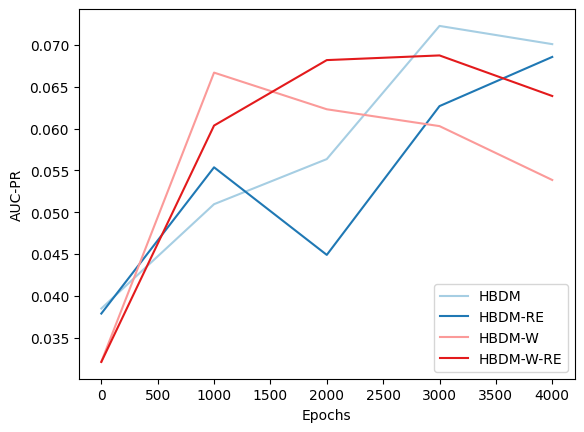

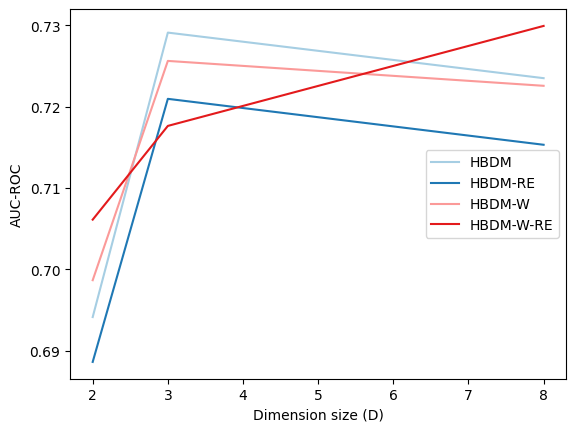

In [97]:
subdf = df[df['epoch']==4000]
# Define the color palette
colors = sns.color_palette("Paired",n_colors=6)
colors = [colors[0], colors[1], colors[4], colors[5]]

# Group the data by 'RE' and 'W'
groups = subdf.groupby(['W','RE'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots()
names = ['HBDM', 'HBDM-RE','HBDM-W','HBDM-W-RE','LDM-G','LDM-G-RE']
# Loop through each group and plot the line chart
for i, (name, group) in enumerate(groups):
    # Extract the x and y data for the line chart
    x_data = group['d']
    y_data = group['roc_400']
    
    # Plot the line chart with a label showing the 'RE' and 'W' values
    ax.plot(x_data, y_data, color=colors[i], label=names[i])

# Set the title and axes labels for the plot
#ax.set_title('AUC-PR performance over various models for varying epochs')
ax.set_xlabel('Dimension size (D)')
ax.set_ylabel('AUC-PR')

# Add a legend to the plot
ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
# Display the plot
plt.show()

In [50]:
subdf.columns

Index(['RE', 'W', 'd', 'epoch', 'roc_50', 'roc_100', 'roc_150', 'roc_200',
       'roc_250', 'roc_300', 'roc_350', 'roc_400'],
      dtype='object')

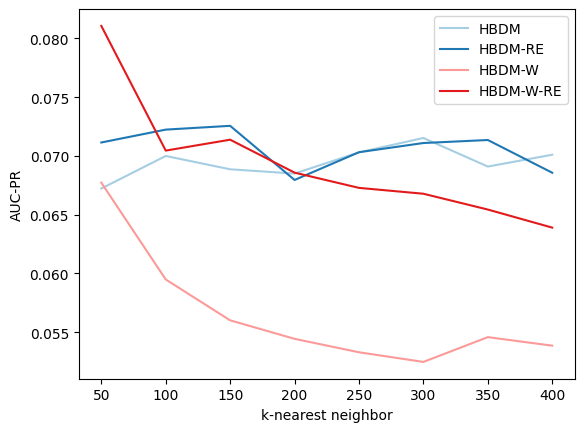